In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from autograd import grad, hessian, jacobian

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.trust_region.trust_region import TrustRegion

In [4]:
def plot_contour(f, xs=10, ys=10, lines=50):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, lines)

In [5]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))

def print_meta_state(meta, m, latest_point):
    print("delta for next iter", meta['delta'])
    print("rho", meta['rho'])
    print("p", meta['direction'])
    print("p_norm", np.linalg.norm(meta['direction'][0]))
    print("m", m(meta['direction'][0], latest_point))
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8], lambda_init=1, delta_init=100, max_iterations=1000):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def m(p, x):
        return F.f(x) + np.array(F.gradient(x)).T @ p + 0.5 * p.T @ F.hessian(x) @ p
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def meta_f(meta):
        if debug:
            print_meta_state(meta, m, xk_at_i[-1])
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, grad(F.f), hes=F.hessian, callback=c, lambda_init=lambda_init, delta_init=delta_init, meta_callback=meta_f, max_iterations=max_iterations))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [6]:
def plot_delta_from_function(minimize, F, g_tol=0.5, debug=False, start_point=[8,8], delta_init=10, lambda_init=1):
    delta_at_i = []
    p_at_i = []
    rho_at_i = []
    x_at_i = []
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        x_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def m(meta):
        delta_at_i.append(meta['delta'])
        p_at_i.append(meta['direction'])
        rho_at_i.append(meta['rho'])
    minimize(F.f, start_point, jacobian(F.f), hes=F.hessian, callback=c, meta_callback=m, delta_init=delta_init, lambda_init=lambda_init)
    #plt.xlabel('iterations')
    #plt.ylabel('trust region radius')
    #plt.plot(delta_at_i)
    return delta_at_i, p_at_i, rho_at_i, x_at_i
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    #plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    #plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [7]:
def plot(F, delta_init):
    lines_delta = []
    lines_xs = []
    starting_points = [
        [-7.0,7.0], [7.0,7.0], [3.0,6.0], [10.0,0.7], [3.0,-6.0]
    ]
    for point in starting_points:
        print(point)
        deltas, ps, rhos, xs = plot_delta_from_function(TrustRegion.minimize, F, lambda_init=1, delta_init=delta_init, start_point=point)
        lines_delta.append(deltas)
        lines_xs.append(xs)
    return lines_delta, lines_xs

In [ ]:
lines_delta, lines_xs = plot(AttractiveSector, 10000.0)

[-7.0, 7.0]


NameError: name 'lines_xs' is not defined

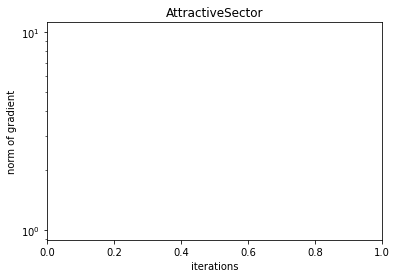

In [11]:
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('norm of gradient')
plt.title('AttractiveSector')
for i, line in enumerate(lines_xs):
    plt.plot([np.linalg.norm(AttractiveSector.gradient(x)) for x in line], color='green', alpha=i/len(lines_xs))

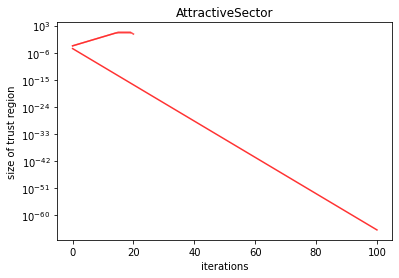

In [21]:
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('size of trust region')
plt.title('AttractiveSector')
for i, line in enumerate(lines_delta):
    plt.plot(line, color='red', alpha=i/len(lines_xs))

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=10000, delta_init=0.001, start_point=[8,8])

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=0, delta_init=0.001)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e3, delta_init=100)

In [ ]:
deltas_ellipsoid, ps_ellipsoid, rhos_ellipsoid, xs_ellipsoid = plot_delta_from_function(TrustRegion.minimize, Ellipsoid, delta_init=1)

In [ ]:
norms_ellipsoid = []
for p in ps_ellipsoid:
    norms_ellipsoid.append(np.linalg.norm(p[0]))
plt.plot((np.append(np.array([1e3]), np.array(deltas_ellipsoid)[:-1]) - np.array(norms_ellipsoid)))

In [ ]:
plt.plot(deltas_ellipsoid[0:10])

In [ ]:
plt.plot(rhos_ellipsoid[0:5])

In [ ]:
def m(p, x):
    return Ellipsoid.f(x) + np.array(Ellipsoid.gradient(x)).T @ p + 0.5 * p.T @ Ellipsoid.hessian(x) @ p
plt.plot([m(np.zeros(len(x)), x) - m(p, x) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
plt.plot([Ellipsoid.f(x) - Ellipsoid.f(x + p) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
#plt.plot(rhos_ellipsoid[0:5])
#plt.plot(deltas_ellipsoid[0:5])

In [ ]:
plot_contour(Rosenbrock.f, xs=10, ys=100)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100)

In [ ]:
deltas_rosenbrock, ps_rosenbrock, rhos_rosenbrock, xs_rosenbrock = plot_delta_from_function(TrustRegion.minimize, Rosenbrock, delta_init=1)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid, delta_init=1)

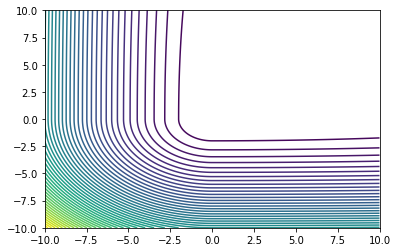

In [ ]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector, start_point=[-7.0, -7.0])

AssertionError: 

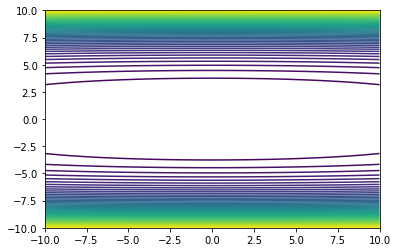

In [9]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, delta_init=1000, start_point=[-3, 0])

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))

In [ ]:
np.linalg.norm(np.array([-1/np.sqrt(2), -1/np.sqrt(2)]))

In [ ]:
q_1 = np.array([0.99905465, -0.04347186])
lambda1 = 7.37412416e+04
